<a href="https://colab.research.google.com/github/subashkatwal/PRODIGY_DS_02/blob/main/TASK_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
titanic = pd.read_csv('titanic.csv')


In [ ]:
titanic.head()
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Data Cleaning

In [ ]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())   # fillna helps to fill the NaN or NULL value to the specified value

titanic= titanic.drop(columns=['Cabin'])
titanic= titanic.dropna(subset=['Embarked']) # helps to remove missing value from DataFrame

Convert Categorical Variables

In [ ]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1}) # maps categorical data into the numeric values
titanic['Embarked'] = titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

Exploratory Data Analysis (EDA)

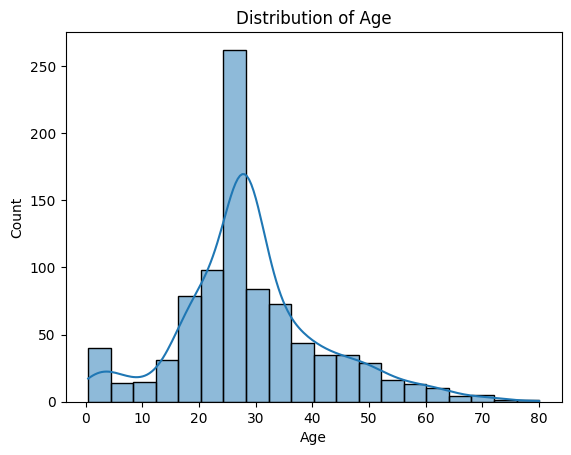

In [ ]:
sns.histplot(titanic['Age'], bins= 20, kde= True)
plt.title("Distribution of Age")
plt.show()

Countplot

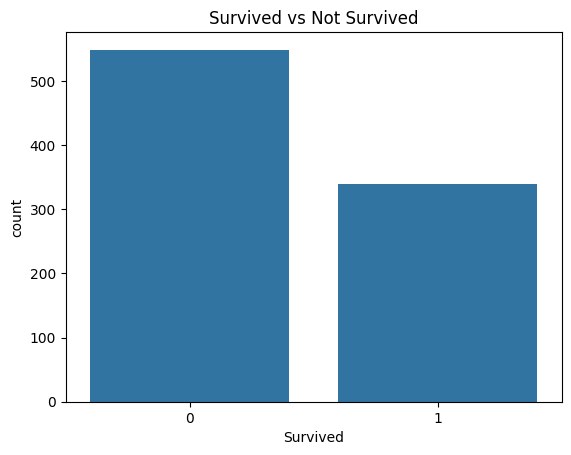

In [ ]:
sns.countplot(x='Survived' ,data = titanic)
plt.title("Survived vs Not Survived")
plt.show()

Bivariate Analysis

Analyze relationships between two variables.

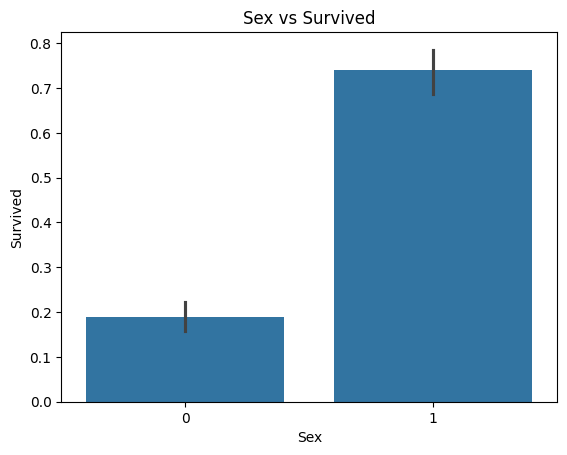

In [ ]:
sns.barplot(x='Sex', y='Survived' , data= titanic)
plt.title("Sex vs Survived")
plt.show()

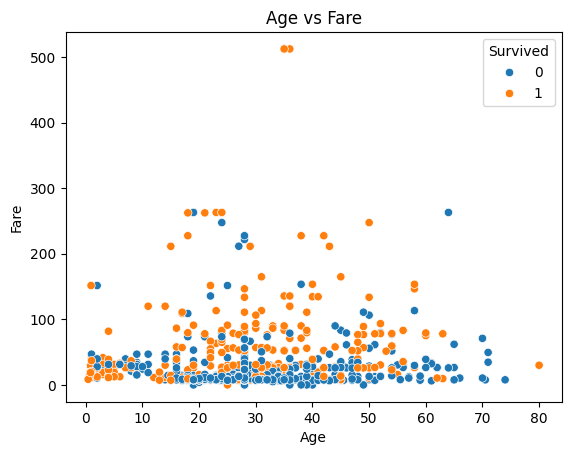

In [ ]:
sns.scatterplot(x= 'Age', y='Fare', hue= 'Survived', data= titanic)
plt.title("Age vs Fare")
plt.show()

Multivariate Analysis

Explore relationships between three or more variables

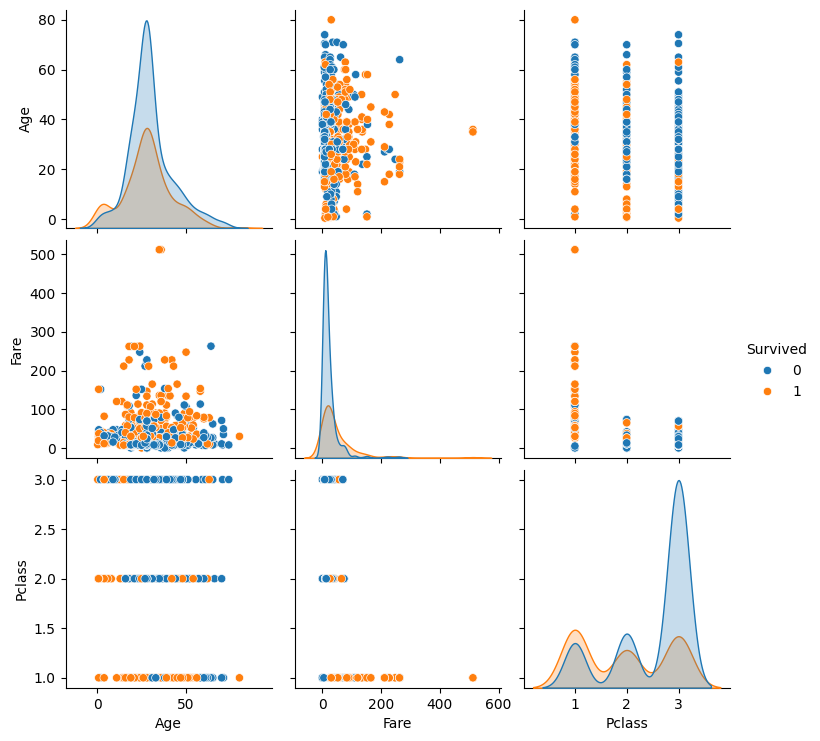

In [ ]:
sns.pairplot(titanic, hue= 'Survived', vars = ['Age','Fare', 'Pclass'])
plt.show()

Heatmap of the correlation

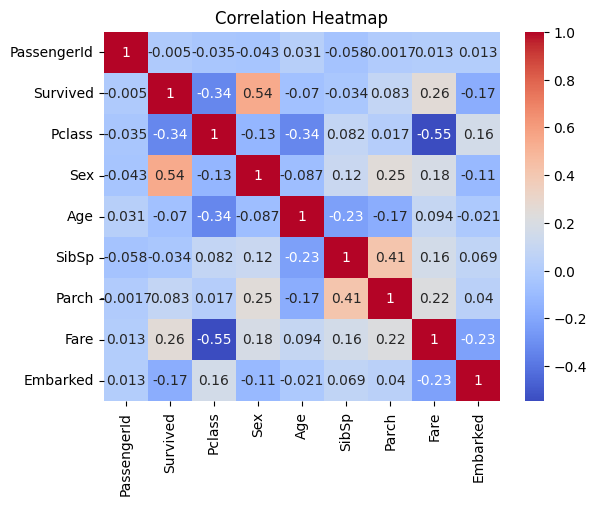

In [ ]:
numeric_titanic = titanic.select_dtypes(include=['float64', 'int64'])
correlation = numeric_titanic.corr()
sns.heatmap(correlation, annot= True , cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
titanic.head()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.3+ KB


Identifying Patterns and Trends in the dataset

Checking survival rate based on the gender and the class.

In [ ]:
print(titanic.groupby(['Pclass', 'Sex'])['Survived'].mean())

Pclass  Sex
1       0      0.368852
        1      0.967391
2       0      0.157407
        1      0.921053
3       0      0.135447
        1      0.500000
Name: Survived, dtype: float64


Investing if the higher fares increase the survival chances

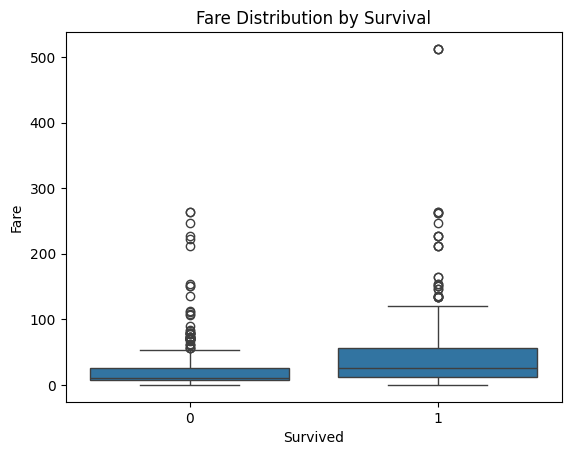

In [ ]:
sns.boxplot(x = 'Survived' , y = 'Fare', data= titanic)
plt.title("Fare Distribution by Survival")
plt.show()


Relationship between Survived and Sex

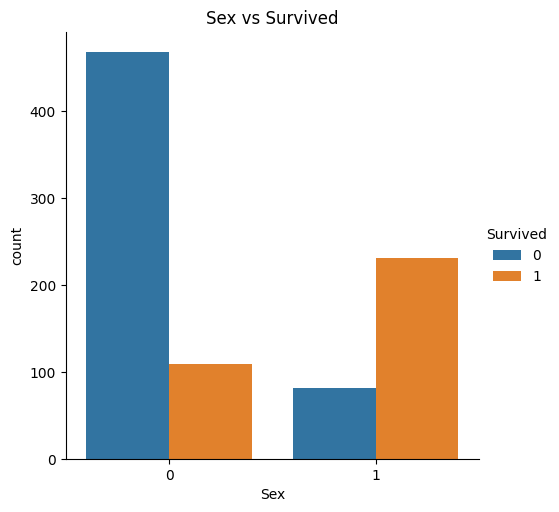

In [ ]:
sns.catplot(titanic, x= 'Sex' , hue = 'Survived' , kind = 'count')
plt.title("Sex vs Survived")
plt.show()

Relationship between Embarked, Fare and Survived

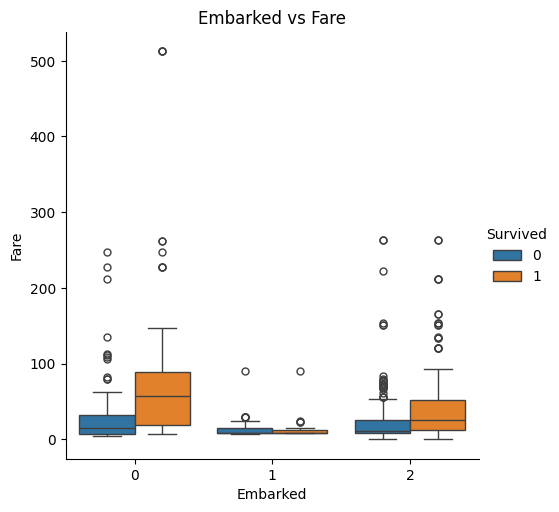

In [ ]:
sns.catplot ( titanic , x= 'Embarked' , y = 'Fare', hue = 'Survived', kind = 'box')
plt.title("Embarked vs Fare")
plt.show()

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


Swarm Plot to Visualize Distributions:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 59.7% of the points cannot be plac

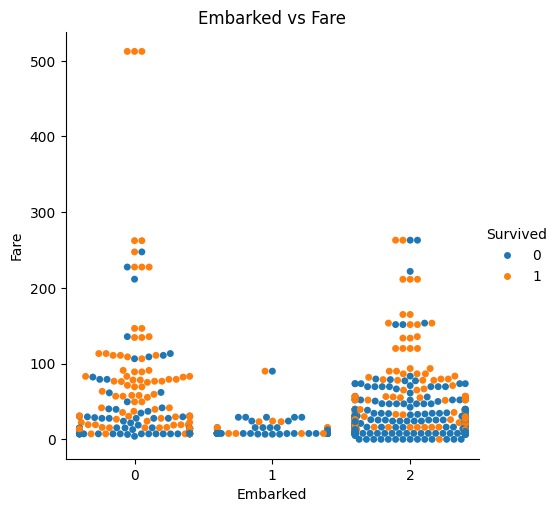

In [ ]:
sns.catplot(titanic , x='Embarked', y='Fare', hue='Survived', kind='swarm')
plt.title("Embarked vs Fare")
plt.show()

Feature Engineering

It is the process of the generating the new features from the existing features

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [ ]:
titanic['Family ']= titanic['SibSp'] + titanic['Parch']+1
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,1


Bining age into categories

In [ ]:
bins = [ 0, 12, 18,60,100 ]
labels = ['Child', 'Teen', 'Adult', 'Senior']
titanic['AgeGroup']= pd.cut(titanic['Age'], bins = bins , labels = labels)


One Hot Encoding

 .get_dummies --------> Convert categorical variable into dummy/indicator variables

In [ ]:
titanic = pd.get_dummies( titanic , columns = ['Sex' ,'Embarked'] ,drop_first = True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Family,AgeGroup,Sex_1,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,Adult,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,Adult,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,Adult,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,Adult,True,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,Adult,False,False,True


Statistical Tools

Chi-Square test for the independence

A Pearson’s chi-square test is a statistical test for categorical data. It is used to determine whether your data are significantly different from what you expected.You want to test a hypothesis about one or more categorical variables.

In [ ]:
from scipy.stats import chi2_contingency


In [ ]:
cross_tab = pd.crosstab(titanic['Sex_1'], titanic['Survived'])

In [ ]:
chi2, dof , p , expected = chi2_contingency(cross_tab)

In [ ]:
print(f'Chi-Square test statistics: {chi2:.2f} and p is {p}')

Chi-Square test statistics: 258.43 and p is 1


T- test for numeric values


In [ ]:
from scipy.stats import ttest_ind


In [ ]:
survived = titanic[titanic['Survived']==1]['Fare']
not_survived = titanic[titanic['Survived']==0]['Fare']

t_statistic , p_value = ttest_ind(survived, not_survived)

print(f"T-test statistics: {t_statistic:.2f} with P value {p_value}")


T-test statistics: 7.86 with P value 1.0797887540538483e-14
